In [92]:
## PAge 142
import numpy as np

Certainly, let's delve deeper into autoencoders and autoregressive models, exploring their architectures, training objectives, and use cases, and providing concrete examples.

### Autoencoder:

**1. Architecture:**
   - **Encoder:** Takes an input and compresses it into a latent space representation.
   - **Decoder:** Reconstructs the input from the latent space representation.
   - **Objective:** Minimize the reconstruction loss, typically using mean squared error.

**2. Use Cases:**
   - **Unsupervised Learning:** Autoencoders are often used for unsupervised learning tasks, such as anomaly detection and feature learning.
   - **Dimensionality Reduction:** By learning a lower-dimensional representation, autoencoders can be used for efficient data compression.

**3. Example:**
Consider an autoencoder for image reconstruction:
```python
# Autoencoder architecture
Encoder: Input (e.g., image) -> Convolutional layers -> Flatten -> Dense layers -> Latent Space
Decoder: Latent Space -> Dense layers -> Reshape -> Deconvolutional layers -> Reconstructed Image

# Training Objective
Minimize Mean Squared Error between Input Image and Reconstructed Image
```

### Autoregressive Model:

**1. Architecture:**
   - **Sequential Prediction:** The model predicts one element at a time, considering the previous elements in the sequence.
   - **Examples:** Recurrent Neural Networks (RNNs), Long Short-Term Memory networks (LSTMs), and Transformers.

**2. Use Cases:**
   - **Sequential Data:** Autoregressive models are well-suited for tasks involving sequences, such as time series prediction, language modeling, and text generation.
   - **Temporal Dependencies:** They capture dependencies within sequential data.

**3. Example:**
Consider an autoregressive language model using a Transformer:
```python
# Transformer architecture
Input Sequence -> Multi-head Self-Attention Layers -> Feedforward Layers -> Output for Current Element

# Training Objective
Maximize the Likelihood of the Next Element given Previous Elements
```

### Key Differences:

1. **Objective:**
   - **Autoencoder:** Minimize reconstruction loss between input and output.
   - **Autoregressive Model:** Maximize likelihood of the next element given previous elements.

2. **Training:**
   - **Autoencoder:** Unsupervised learning with a focus on reconstruction.
   - **Autoregressive Model:** Often trained with a likelihood-based objective, especially in the context of probabilistic language modeling.

3. **Use Cases:**
   - **Autoencoder:** Dimensionality reduction, anomaly detection, feature learning.
   - **Autoregressive Model:** Sequential data tasks like time series prediction, language modeling, and text generation.

4. **Architecture:**
   - **Autoencoder:** Encoder-decoder structure for compression and reconstruction.
   - **Autoregressive Model:** Sequential prediction, capturing dependencies within a sequence.

In summary, autoencoders focus on learning a compact representation of the input, while autoregressive models excel at modeling sequential dependencies. The choice between them depends on the specific task and the characteristics of the data at hand.

- <b>Causal language models</b>are a type of language model that processes input data in a causal, or sequential, manner. These models are often used in natural language processing (NLP) tasks where the order of elements in the sequence matters, such as language modeling, text generation, and autoregressive tasks. The term "causal" refers to the fact that the model generates predictions in a way that respects the temporal order of the input.|

- Such a shift to Multi-Task Learning (MTL) makes it possible to
    perform many different tasks for the same input. But how do the models determine which task to
    perform? They do this through zero-shot task transfer.

 ### Working with Seq2Seq models
- The left encoder and the right decoder part of the transformer are connected with cross-attention,
    which helps each decoder layer attend over the final encoder layer. This naturally pushes models toward
    producing output that closely ties to the original input. A Seq2Seq model, which is the original
    transformer, achieves this by using the following scheme:
    Input tokens-> embeddings-> encoder-> decoder-> output tokens
    Seq2Seq models keep the encoder and decoder part of the transformer. T5, Bidirectional and Auto-
    Regressive Transformer (BART), and Pre-training with Extracted Gap-sentences for
    Abstractive Summarization Sequence-to-Sequence models (PEGASUS) are among the popular
    Seq2Seq models.

### Working With The t5 models
- T5, or Text-to-Text Transfer Transformer, is an NLP architecture introduced in the paper "Exploring the Limits of Transfer Learning with a Unified Text-to-Text Transformer (2019)." Unlike traditional approaches that treat NLP problems as word prediction, question answering, or token classification tasks, T5 proposes a unifying framework by casting all NLP tasks into a text-to-text (Seq2Seq) format. In this framework, both input and output are represented as lists of tokens.

    The T5 model follows the encoder-decoder transformer architecture with modifications in layer normalization and position embeddings. Instead of using sinusoidal or learned embeddings for positions, T5 employs relative positional embeddings. This model is designed to handle various NLP tasks, such as machine translation, linguistic acceptability, semantic similarity, and summarization, within a unified framework.


    T5 is a single model capable of addressing diverse tasks by converting them into a text-to-text format. The model is trained on labeled textual datasets, where a task prefix is added to the input. For instance, for English-German translation, the input with the prefix "translate English to German: That is good." produces the output "das is gut." Similarly, any input with a "summarize:" prefix will be summarized by the model. This approach allows T5 to generalize across different tasks and perform effectively on tasks ranging from question answering to text summarization.

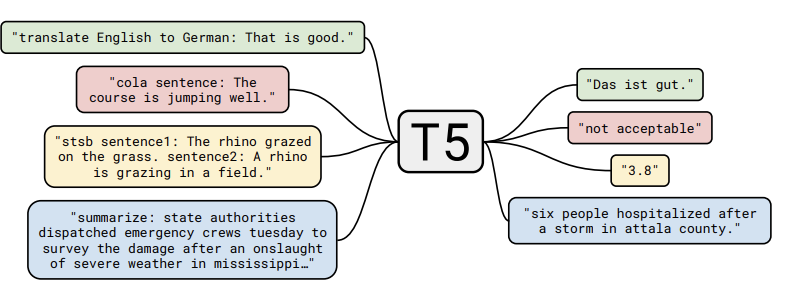

### Working with the bart model

BART is a sequence-to-sequence model that leverages the transformer architecture. It is designed for various natural language processing tasks, including text generation, summarization, and language understanding. The key innovation in BART is the use of a bidirectional pretraining stage followed by an autoregressive training stage.

Here's a brief overview of the two training stages:

1. **Pretraining (Bidirectional):** In this stage, BART is pretrained on a large corpus of text data using a denoising autoencoder objective. The model learns to predict missing parts of a text, which helps it understand the relationships and context between different parts of a document.

2. **Autoregressive Training:** After pretraining, BART is fine-tuned on specific downstream tasks using autoregressive training. This involves training the model to generate the target sequence (e.g., a summary or translation) one token at a time, conditioning on the previously generated tokens.

The bidirectional pretraining followed by autoregressive fine-tuning allows BART to capture both local and global context in the input data, making it versatile for various NLP tasks.

Keep in mind that the field of machine learning evolves rapidly, and there might be new developments or models with the name "BART" that have emerged since my last update in January 2022. If there have been updates or new models released after this date, I recommend checking the latest literature and resources for the most current information.


In [6]:
from transformers import BartTokenizer,BartForConditionalGeneration
from transformers import pipeline


d:\gpt_2config\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
model=BartForConditionalGeneration.from_pretrained("sshleifer/distilbart-cnn-12-6")
tokenizer=BartTokenizer.from_pretrained("sshleifer/distilbart-cnn-12-6")

In [ ]:
nlp=pipeline("summarization",model=model,tokenizer=tokenizer)

In [ ]:
text='''
We order two different types of jewelry from this
company the other jewelry we order is perfect.
However with this jewelry I have a few things I
don't like. The little Stone comes out of these
and customers are complaining and bringing them
back and we are having to put new jewelry in their
holes. You cannot sterilize these in an autoclave
as well because it heats up too much and the glue
does not hold up so the second group of these that
we used I did not sterilize them that way and the
stones still came out. When I use a dermal clamp
to put the top on the stones come out immediately.
DO not waste your money on this particular product
buy the three mm. that has the claws that hold the
jewelry in those are perfect. So now I'm stuck
with jewelry that I can't sell not good for
business.'''

In [ ]:
q=nlp(text)

In [ ]:
q

# AR Language Model Training


Emma language text

In [2]:
!wget https://github.com/AllenDowney/ThinkPython/blob/master/code/emma.txt

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!python -m wget

usage: wget.py [options] URL

options:
  -o --output FILE|DIR   output filename or directory
  -h --help
  --version



In [5]:
!python -m wget  https://github.com/AllenDowney/ThinkPython/blob/master/code/emma.txt


Saved under emma.txt


In [6]:
from tokenizers.models import BPE
from tokenizers import Tokenizer
from tokenizers.decoders import ByteLevel as ByteLevelDecoder
from tokenizers.normalizers import Sequence,Lowercase
from tokenizers.pre_tokenizers import ByteLevel
from tokenizers.trainers import BpeTrainer

In [7]:
tokenizer=Tokenizer(BPE())
tokenizer.normalizer=Sequence([  
    Lowercase()
])
tokenizer.pre_tokenizer=ByteLevel()
tokenizer.decoder=ByteLevelDecoder()

In [9]:
trainer=BpeTrainer(vocab_size=300000,initial_alphabet=ByteLevel.alphabet(),
                  special_tokens=[
                      "<cls>",
                      "<s>",
                      "<pad>",
                      "</s>",
                      "<unk>",
                      "<mask>"
                  ])
tokenizer.train(['./emma.txt'],trainer)

In [12]:
!mkdir tokenizersd

In [13]:
tokenizer.save("./tokenizersd/tokenizers.json")

In [14]:
from transformers import PreTrainedTokenizerFast

d:\gpt_2config\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
tokenizer_gpt = PreTrainedTokenizerFast.from_pretrained("./tokenizersd/tokenizers.json")

d:\gpt_2config\venv\Lib\site-packages\transformers\tokenization_utils_base.py:1930: FutureWarning: Calling PreTrainedTokenizerFast.from_pretrained() with the path to a single file or url is deprecated and won't be possible anymore in v5. Use a model identifier or the path to a directory instead.
  warnings.warn(


In [33]:
from transformers import GPT2TokenizerFast,GPT2Config,TFGPT2LMHeadModel

In [20]:
tokenizer_gpt.add_special_tokens({
"eos_token": "</s>",
"bos_token": "<s>",
"unk_token": "<unk>",
"pad_token": "<pad>",
"mask_token": "<mask>"
    
})

0

In [30]:
tokenizer_gpt.encode(["<s> Hello world where are we heading to </s>","help"])

[1, 294, 299, 84, 1288, 1354, 554, 376, 1829, 290, 289, 226, 3, 1916]

In [34]:
config = GPT2Config(
vocab_size=tokenizer_gpt.vocab_size,
bos_token_id=tokenizer_gpt.bos_token_id,
eos_token_id=tokenizer_gpt.eos_token_id
)
model = TFGPT2LMHeadModel(config)

In [35]:
config

GPT2Config {
  "activation_function": "gelu_new",
  "attn_pdrop": 0.1,
  "bos_token_id": 1,
  "embd_pdrop": 0.1,
  "eos_token_id": 3,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 12,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "transformers_version": "4.37.2",
  "use_cache": true,
  "vocab_size": 17106
}

In [37]:
with open("emma.txt", "r", encoding='utf-8') as f:
    content = f.readlines()

In [49]:
content[345].strip()

'<div>'

In [87]:
contents=[]

In [90]:

for c in content:
    if len(c)>10:
        contents.append(c.strip())
        contents = " ".join(contents)+tokenizer_gpt.eos_token

In [89]:
tokenized_content = tokenizer_gpt.encode(contents)

TypeError: TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]

In [60]:
sample_len = 100
examples=[]
for i in range(0, len(tokenized_content)):

     examples.append(tokenized_content[i:i + sample_len])

In [73]:
train_data=[]
labels=[]
for example in examples:
    train_data.append(example[:-1])
    labels.append(example[1:])


In [69]:
import tensorflow as tf

In [74]:
train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data, padding='post')
labels = tf.keras.preprocessing.sequence.pad_sequences(labels, padding='post')

In [76]:
labels

array([[13503, 11898,    35,     3],
       [11898,    35,     3,     0],
       [   35,     3,     0,     0],
       [    3,     0,     0,     0],
       [    0,     0,     0,     0]])

In [77]:
import tensorflow as tf
buffer = 500
batch_size = 16
dataset = tf.data.Dataset.from_tensor_slices((train_data, labels))
dataset = dataset.shuffle(buffer).batch(batch_size, drop_remainder=True)

In [78]:
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08,
clipnorm=1.0)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=[loss, *[None] * model.config.n_layer],
metrics=[metric])

In [79]:
epochs = 3
model.fit(dataset, epochs=epochs)

ValueError: Expected input data to be non-empty.